CIFAR-10 with CNN

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from keras.datasets import cifar10
from keras import layers, models


In [ ]:
import matplotlib.pyplot as plt

***Dataset***

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

***Reshaping***

In [ ]:
y_train[:5] #it is a 2d array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

*Converting 2d array to 1d*

In [ ]:
y_train = y_train.reshape(-1,) 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
index=0
def plt_image(X,y,index):
    for index in range(10):
        plt.figure(figsize=(15,2))
        plt.imshow(X[index])
        plt.xlabel(classes[y[index]])

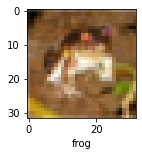

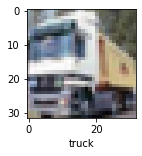

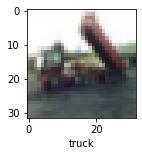

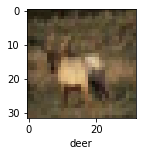

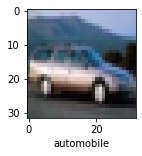

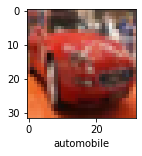

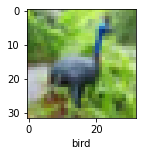

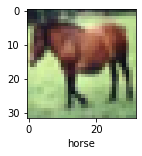

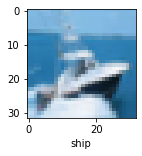

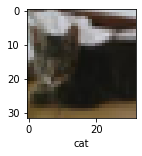

In [ ]:
plt_image(X_train,y_train,0)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

*Here the values are in between 0-255*

***Normalization***

In [ ]:
X_train = X_train / 255
X_test  = X_test / 255

In [ ]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

***ANN for classification***

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.8113 - accuracy: 0.3582
Epoch 2/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.6227 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5405 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4817 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4330 - accuracy: 0.4951


***Classification report***

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.41      0.51      1000
           1       0.72      0.42      0.53      1000
           2       0.40      0.32      0.36      1000
           3       0.38      0.18      0.25      1000
           4       0.58      0.21      0.31      1000
           5       0.32      0.51      0.39      1000
           6       0.56      0.50      0.53      1000
           7       0.35      0.76      0.48      1000
           8       0.72      0.49      0.58      1000
           9       0.39      0.74      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



***CNN model ***

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4459 - accuracy: 0.4789
Epoch 2/20
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0973 - accuracy: 0.6144
Epoch 3/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9713 - accuracy: 0.6612
Epoch 4/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8869 - accuracy: 0.6929
Epoch 5/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8285 - accuracy: 0.7142
Epoch 6/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7713 - accuracy: 0.7310
Epoch 7/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7207 - accuracy: 0.7491
Epoch 8/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6779 - accuracy: 0.7632
Epoch 9/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6413 - accuracy: 0.7765
Epoch 10/20
1563/1563 [==============================] - 64s 41m

***Evaluation***

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.2296 - accuracy: 0.6846


[1.2296421527862549, 0.6845999956130981]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.0524739e-07, 7.2622872e-09, 3.4681809e-04, 9.2271239e-01,
        1.5983618e-05, 7.5812683e-02, 1.0581950e-03, 5.6374556e-06,
        4.8028585e-05, 1.8854956e-11],
       [3.6701003e-06, 2.6910233e-05, 3.9892871e-09, 3.3572631e-11,
        2.3999686e-11, 2.0923923e-14, 4.1366240e-14, 5.3409391e-11,
        9.9996912e-01, 2.1739679e-07],
       [2.7472749e-01, 2.0305226e-02, 3.2953198e-05, 9.7202108e-05,
        1.8698915e-05, 3.3151984e-04, 2.9298154e-04, 4.0358005e-05,
        3.1402946e-02, 6.7275059e-01],
       [8.8357306e-01, 2.3658946e-04, 1.2740377e-02, 1.7518603e-06,
        6.1321909e-05, 4.8506681e-08, 6.8230103e-05, 6.6054923e-07,
        1.0329912e-01, 1.8886452e-05],
       [5.0282338e-09, 5.3883198e-08, 5.7056586e-05, 7.9235137e-03,
        1.5743767e-01, 1.7130587e-04, 8.3440626e-01, 4.5631419e-09,
        4.0905875e-06, 3.8783914e-11]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [ ]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

***Plotting***

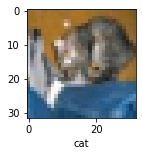

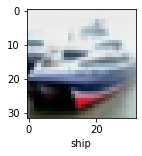

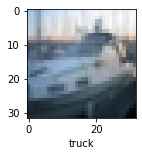

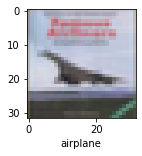

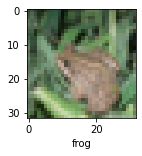

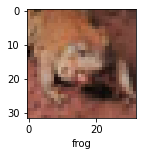

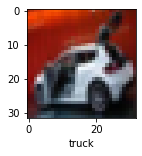

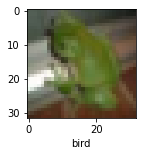

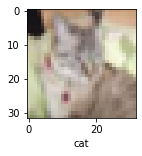

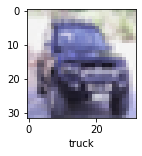

In [ ]:
plt_image(X_test,y_classes,0)

***Class***

In [ ]:
classes[y_classes[3]]

'airplane'